In [1]:
#read data
d1=read.table("student-mat.csv",sep=",",header=TRUE)
d2=read.table("student-por.csv",sep=",",header=TRUE)


In [2]:
str(d1)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [3]:
summary(d1)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

In [4]:
#taking one new variable avggrade
d1$avggrades=(d1$G1+d1$G2+d1$G3)/3


In [5]:
#taking avggrade and dropping g1,g2,g3
d1=d1[,c(1:30,34)]

In [6]:
str(d1)

'data.frame':	395 obs. of  31 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [10]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.2"

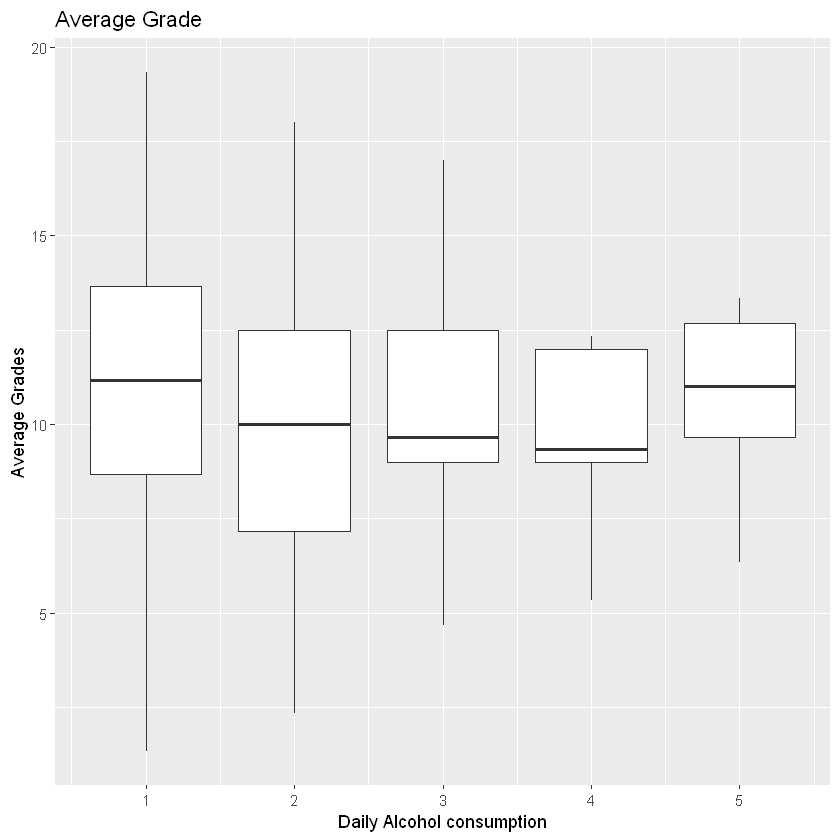

In [12]:
ggplot(d1, aes(x=Dalc, y=avggrades, group=Dalc))+
  geom_boxplot()+
  theme(legend.position="none")+
  xlab("Daily Alcohol consumption")+
  ylab("Average Grades")+
  ggtitle("Average Grade")

In [15]:
#applying multiple regression
lm2<-lm(d1$avggrades ~., data=d1[,1:30])
summary(lm2)


Call:
lm(formula = d1$avggrades ~ ., data = d1[, 1:30])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8300 -1.9847  0.1797  2.1218  7.3885 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      13.026412   3.525493   3.695 0.000255 ***
schoolMS          0.329757   0.622793   0.529 0.596803    
sexM              1.038900   0.393415   2.641 0.008638 ** 
age              -0.214090   0.170901  -1.253 0.211134    
addressU          0.379715   0.459576   0.826 0.409230    
famsizeLE3        0.581104   0.384140   1.513 0.131235    
PstatusT         -0.132412   0.569551  -0.232 0.816295    
Medu              0.297769   0.254265   1.171 0.242345    
Fedu              0.013837   0.218427   0.063 0.949526    
Mjobhealth        0.979016   0.879771   1.113 0.266544    
Mjobother        -0.479789   0.561106  -0.855 0.393085    
Mjobservices      0.557146   0.627727   0.888 0.375378    
Mjobteacher      -1.083875   0.816847  -1.327 0.185394    
Fjobheal

In [16]:
#so from avove values we find that failures,schoolsupyes,famsupes,goout,studytime,sexM

In [18]:
lm.predictions<-predict(lm2,d1)


In [20]:
#accuracy
nmse.lm<-mean((lm.predictions-d1[,"avggrades"])^2)/mean((mean(d1$avggrades)-d1[,"avggrades"])^2)
nmse.lm

[1] 0.688738

In [21]:
#so we get the accuracy of around 69%from multiple linear regression

In [22]:
#Similarily we will do it for d2 dataset

In [23]:
str(d2)

'data.frame':	649 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [24]:
summary(d2)

 school   sex          age        address famsize   Pstatus      Medu      
 GP:423   F:383   Min.   :15.00   R:197   GT3:457   A: 80   Min.   :0.000  
 MS:226   M:266   1st Qu.:16.00   U:452   LE3:192   T:569   1st Qu.:2.000  
                  Median :17.00                             Median :2.000  
                  Mean   :16.74                             Mean   :2.515  
                  3rd Qu.:18.00                             3rd Qu.:4.000  
                  Max.   :22.00                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home :135   at_home : 42   course    :285   father:153  
 1st Qu.:1.000   health  : 48   health  : 23   home      :149   mother:455  
 Median :2.000   other   :258   other   :367   other     : 72   other : 41  
 Mean   :2.307   services:136   services:181   reputation:143               
 3rd Qu.:3.000   teacher : 72   teacher : 36                                
 Max. 

In [25]:
d2$avggrades=(d2$G1+d2$G2+d2$G3)/3


In [27]:
#taking avggrade and dropping g1,g2,g3
d2=d2[,c(1:30,34)]

In [28]:
str(d2)

'data.frame':	649 obs. of  31 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [29]:
#applying multiple regression
lm2<-lm(d2$avggrades ~., data=d2[,1:30])
summary(lm2)


Call:
lm(formula = d2$avggrades ~ ., data = d2[, 1:30])

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9198  -1.3102  -0.0624   1.3368   7.4470 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       9.05674    1.70784   5.303 1.60e-07 ***
schoolMS         -1.10679    0.22996  -4.813 1.88e-06 ***
sexM             -0.55904    0.21508  -2.599  0.00957 ** 
age               0.08871    0.08791   1.009  0.31330    
addressU          0.22700    0.22522   1.008  0.31391    
famsizeLE3        0.30369    0.21078   1.441  0.15015    
PstatusT          0.22732    0.29823   0.762  0.44622    
Medu              0.08938    0.13019   0.687  0.49265    
Fedu              0.12335    0.11851   1.041  0.29835    
Mjobhealth        0.70655    0.46238   1.528  0.12702    
Mjobother         0.14148    0.26059   0.543  0.58737    
Mjobservices      0.34821    0.32094   1.085  0.27837    
Mjobteacher       0.43034    0.43176   0.997  0.31930    
Fjobhealth  

In [30]:
#so from above we see that significant attributes health,absences,higheryes,schoolsupyes,failures,studytime,sexM,schoolMs

In [32]:
lm.predictions<-predict(lm2,d2)

In [34]:
#accuracy
nmse.lm<-mean((lm.predictions-d2[,"avggrades"])^2)/mean((mean(d2$avggrades)-d2[,"avggrades"])^2)
nmse.lm

[1] 0.6153964

In [35]:
#so we see accuracy decresed more on the dateset d2

In [ ]:
#we can say till now decision tree is better choice